### Rain Prediction in Agriculture using Machine Learning

A. 
Objective:
Predict rainfall patterns to help farmers optimize their planting schedules, irrigation systems, and crop selection. Accurate rainfall predictions can help:

Determine the best times for sowing, fertilizing, and harvesting.
Reduce water consumption by predicting irrigation needs.
Prevent crop damage due to unexpected weather conditions (like excessive rain).
Assist with drought management by identifying periods of insufficient rainfall.


B.
How Rain Prediction Benefits Agriculture:
Optimal Planting Schedule: Farmers can decide when to plant based on forecasted rain, ensuring crops receive adequate water at the right time.
Efficient Irrigation: With rain predictions, farmers can avoid over-irrigation, saving water and reducing costs.
Crop Selection: Different crops thrive under specific water conditions. Predicting rainfall helps farmers select suitable crops for the upcoming season.
Drought and Flood Management: Farmers can prepare for extreme weather events, such as droughts or floods, reducing the risk of crop loss.

C.
Why Use Machine Learning Approach:
There are really no failproof methods by which we can predict whether there will be rainfall today or not. Even the meteorological department’s prediction fails sometimes. In this project the aim is build a machine-learning model which can predict whether there will be rainfall today or not based on certain atmospheric factors. It has been proven that machine learning models tend to perform better in tackling the problem of Rainfall Prediction based on previous documented tasks and research carried out by several highly skilled individuals.lance.



In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler


In [3]:
# Load the dataset  
df =pd.read_csv('rainfall_prediction_dataset.csv')
df.head()


,pressure,maxtemp,dewpoint,humidity,cloud,rainfall,sunshine,windspeed
0,1025.9,19.9,13.1,72,49,1,9.3,26.3
1,1022.0,21.7,15.6,81,83,1,0.6,15.3
2,1019.7,20.3,18.4,95,91,1,0.0,14.2
3,1018.9,22.3,18.8,90,88,1,1.0,16.9
4,1015.9,21.3,19.9,95,81,1,0.0,13.7


In [5]:
#let’s check the size of the dataset.
df.shape

(366, 8)

In [6]:
#Let’s check which column of the dataset contains which type of data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pressure   366 non-null    float64
 1   maxtemp    366 non-null    float64
 2   dewpoint   366 non-null    float64
 3   humidity   366 non-null    int64  
 4   cloud      366 non-null    int64  
 5   rainfall   366 non-null    int64  
 6   sunshine   366 non-null    float64
 7   windspeed  366 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 23.0 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
rainfall,366.0,0.680328,0.466988,0.0,0.000,1.00,1.000,1.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
windspeed,366.0,21.536986,10.055908,4.4,13.725,20.50,27.825,59.5


Data Cleaning
The data which is obtained from the primary sources is termed the raw data and required a lot of preprocessing 
before we can derive any conclusions from it or do some modeling on it. Those preprocessing steps are known as data cleaning and it includes, outliers removal, null value imputation,
and removing discrepancies of any sort in the data inputs.

In [8]:
#Let's check for missing values in a DataFrame (df).
df.isnull().sum()

pressure     0
maxtemp      0
dewpoint     0
humidity     0
cloud        0
rainfall     0
sunshine     0
windspeed    0
dtype: int64

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.columns

Index(['pressure', 'maxtemp', 'dewpoint', 'humidity', 'cloud', 'rainfall',
       'sunshine', 'windspeed'],
      dtype='object')

In [11]:
#if there are unnecessary spaces in the names of the columns then let’s remove that.
df.rename(str.strip,
          axis='columns', 
          inplace=True)

df.columns

Index(['pressure', 'maxtemp', 'dewpoint', 'humidity', 'cloud', 'rainfall',
       'sunshine', 'windspeed'],
      dtype='object')

In [12]:
for col in df.columns:
  
  # Checking if the column contains
  # any null values
  if df[col].isnull().sum() > 0:
    val = df[col].mean()
    df[col] = df[col].fillna(val)
    
df.isnull().sum().sum()


0

#### Exploratory Data Analysis
EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. Here we will see how to check the data imbalance and skewness of the data.

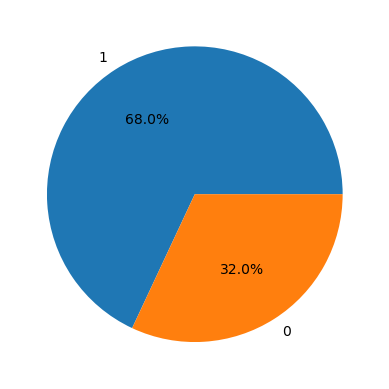

In [13]:
plt.pie(df['rainfall'].value_counts().values,
        labels = df['rainfall'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [14]:
df.groupby('rainfall').mean()

,pressure,maxtemp,dewpoint,humidity,cloud,sunshine,windspeed
rainfall,,,,,,,
0,1014.576923,27.070940,18.766667,73.000000,51.256410,7.586325,19.275214
1,1013.350602,25.777912,20.563454,83.550201,80.465863,2.931325,22.599747


Here we can clearly draw some observations:

###### 1-maxtemp is relatively lower on days of rainfall.
###### 2-dewpoint value is higher on days of rainfall.
###### 3-humidity is high on the days when rainfall is expected.
###### 4-Obviously, clouds must be there for rainfall.
###### 5-sunshine is also less on days of rainfall.
###### 6-windspeed is observed to be higher on days of rainfall.

The observations we have drawn from the above dataset are very much similar to what is observed in real life as well.

In [19]:
features = list(df.select_dtypes(include = np.number).columns)
print(features)

['pressure', 'maxtemp', 'dewpoint', 'humidity', 'cloud', 'rainfall', 'sunshine', 'windspeed']


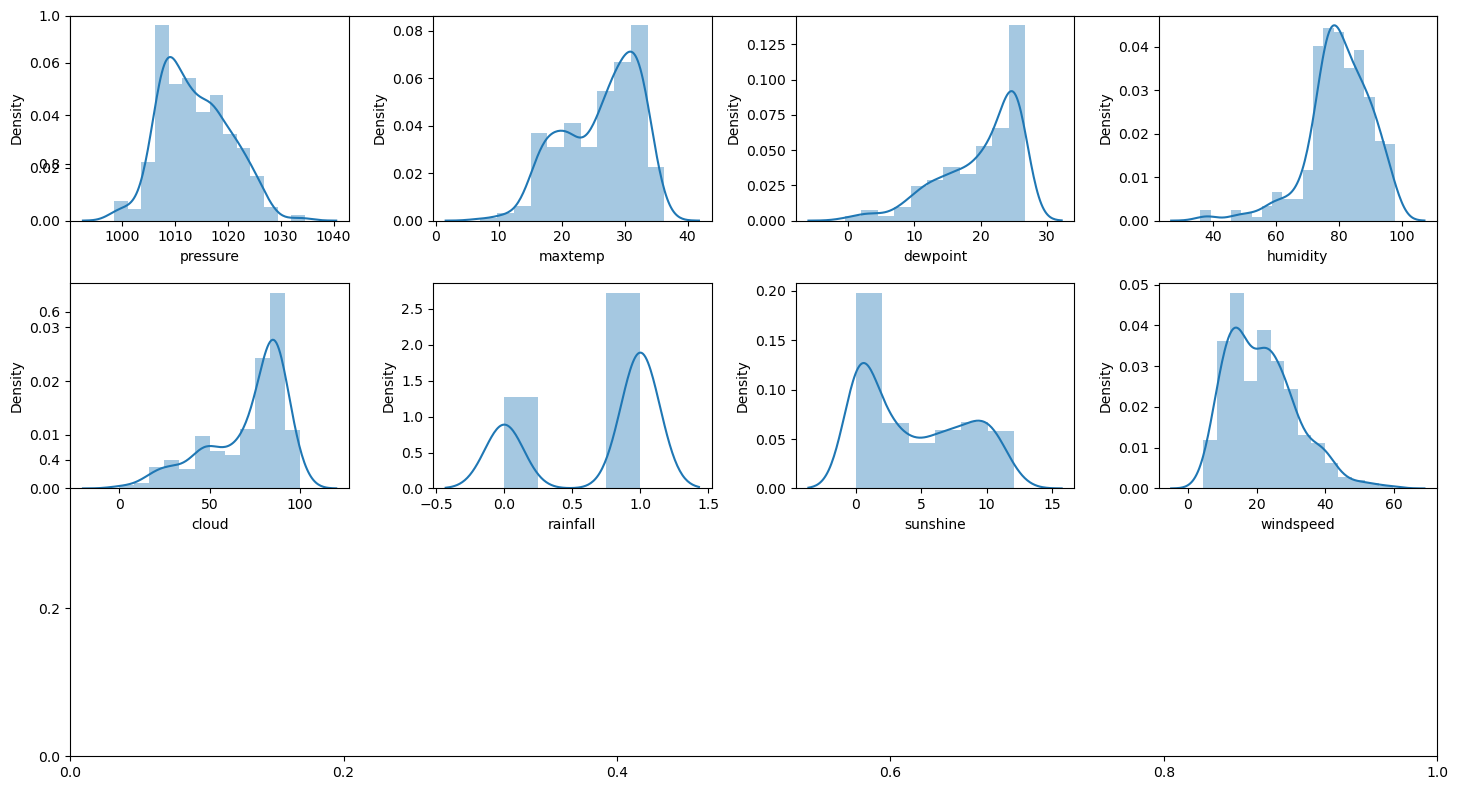

In [20]:
#Let’s check the distribution of the continuous features given in the dataset.
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()



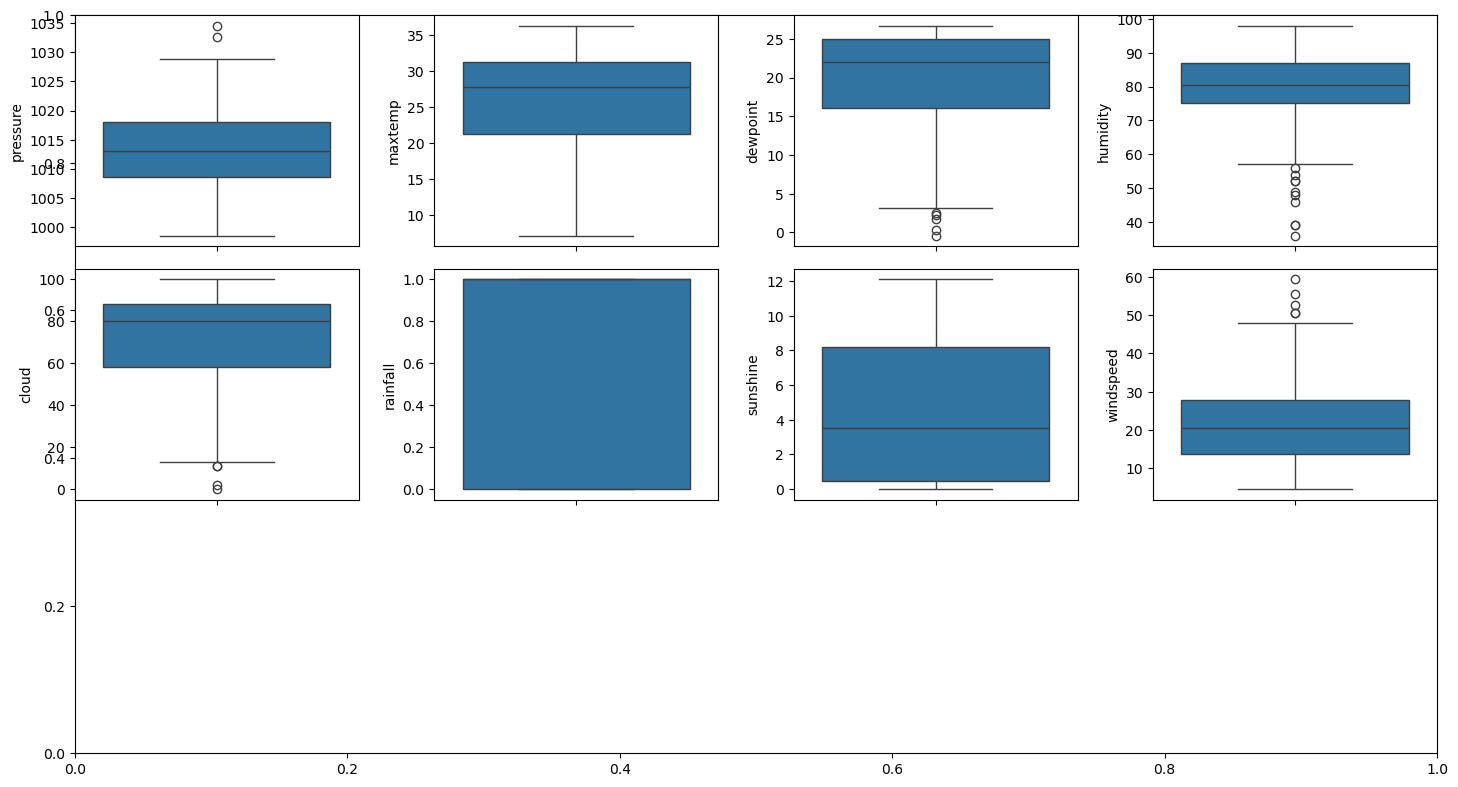

In [22]:
#Let’s draw boxplots for the continuous variable to detect the outliers present in the data.
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()


In [23]:
#There are outliers in the data but sadly we do not have much data so, we cannot remove this.
df.replace({'yes':1, 'no':0}, inplace=True)

Sometimes there are highly correlated features that just increase the dimensionality of the feature space and do not good for the model’s performance. So we must check whether there are highly correlated features in this dataset or not.

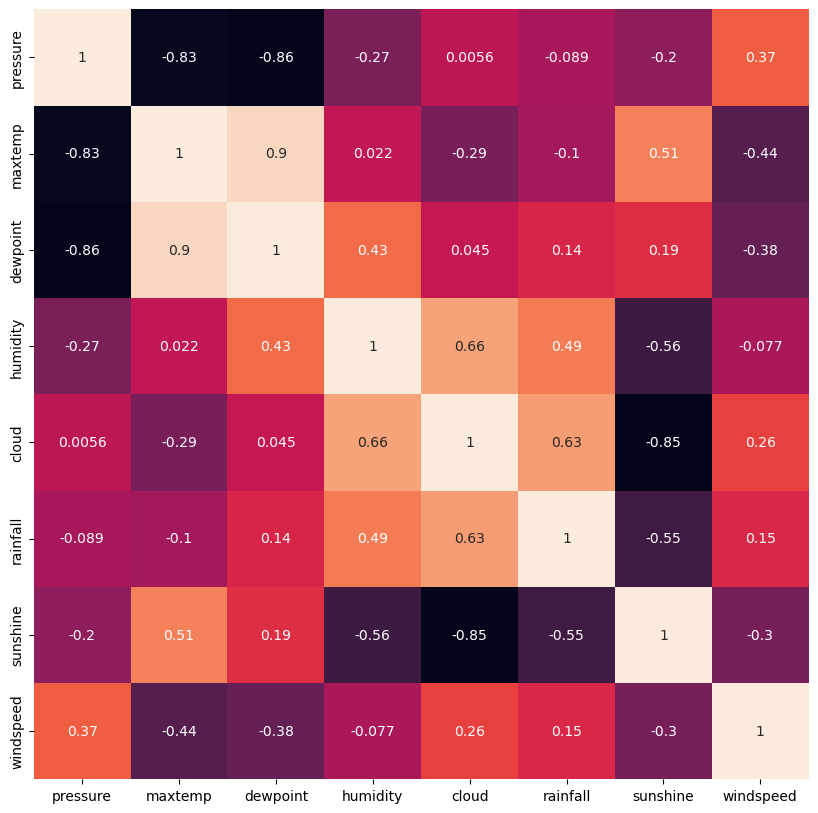

In [24]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr(),
           annot=True,
           cbar=False)
plt.show()

Now we will remove the highly correlated features ‘maxtemp’ and ‘mintemp’. Because temp and dewpoint provide distinct information regarding the weather and atmospheric conditions we cannot remove these

### Model Training
Now we will separate the features and target variables and split them into training and testing data by using which we will select the model which is performing best on the validation data.

The features of the dataset were at different scales so, normalizing it before training will help us to obtain optimum results faster along with stable training.

#### Now let’s train some state-of-the-art models for classification and train them on our training data
- >LogisticRegression
- >XGBClassifier
- >SVC

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import pandas as pd

# Function to preprocess the data
def preprocess_data(df, target_column, test_size=0.2):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

# Function to train a given model
def train_model(model, X_train_scaled, y_train):
    model.fit(X_train_scaled, y_train)
    return model

# Function to evaluate model performance based on AUC-ROC
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else y_pred
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    
    return accuracy, precision, recall, auc_roc

# Function to find the best model based on AUC-ROC and store results in a DataFrame
def find_best_model(models, X_train_scaled, X_test_scaled, y_train, y_test):
    results = []  # List to hold model names and their corresponding AUC-ROC scores
    best_model = None
    best_auc_roc = float("-inf")
    
    for name, model in models.items():
        print(f"Training {name}...")
        trained_model = train_model(model, X_train_scaled, y_train)
        _, _, _, auc_roc = evaluate_model(trained_model, X_test_scaled, y_test)
        
        # Append model name and AUC-ROC score to results
        results.append({"Model": name, "AUC-ROC Score": auc_roc})
        
        if auc_roc > best_auc_roc:
            best_auc_roc = auc_roc
            best_model = (name, trained_model)
    
    print(f"\nBest Model: {best_model[0]} with AUC-ROC score: {best_auc_roc:.4f}")
    
    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)
    return best_model, results_df

# Initialize classification models with adjusted hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C=0.5, max_iter=200),
    "Ridge Classifier": RidgeClassifier(alpha=0.5),
    "Gradient Boosting Classifier": GradientBoostingClassifier(learning_rate=0.1, n_estimators=150),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7),
    "Random Forest Classifier": RandomForestClassifier(max_depth=10, n_estimators=100),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=15, min_samples_split=5),
    "XGBoost": xgb.XGBClassifier(learning_rate=0.05, max_depth=4, n_estimators=100),
    "Support Vector Machine": SVC(C=1.0, gamma=0.05, probability=True)
}

X_train_scaled, X_test_scaled, y_train, y_test = preprocess_data(df, target_column="rainfall")
best_model_name, results_df = find_best_model(models, X_train_scaled, X_test_scaled, y_train, y_test)

results_df.sort_values(by="AUC-ROC Score", ascending=False).reset_index(drop=True)

Training Logistic Regression...
Training Ridge Classifier...
Training Gradient Boosting Classifier...
Training K-Nearest Neighbors...
Training Random Forest Classifier...
Training Decision Tree Classifier...
Training XGBoost...
Training Support Vector Machine...

Best Model: Logistic Regression with AUC-ROC score: 0.8150


,Model,AUC-ROC Score
0,Logistic Regression,0.815004
1,Support Vector Machine,0.809889
2,K-Nearest Neighbors,0.809463
3,Random Forest Classifier,0.780904
4,Gradient Boosting Classifier,0.752771
5,XGBoost,0.728900
6,Decision Tree Classifier,0.696078
7,Ridge Classifier,0.646633


### Model Evaluation
From the above accuracies, we can say that Logistic Regression and support vector classifier are satisfactory as the gap between the training and the validation accuracy is low. 
Let’s plot the confusion matrix as well for the validation data.

Confusion matrix for the validation data

Let’s plot the classification report as well for the validation data.

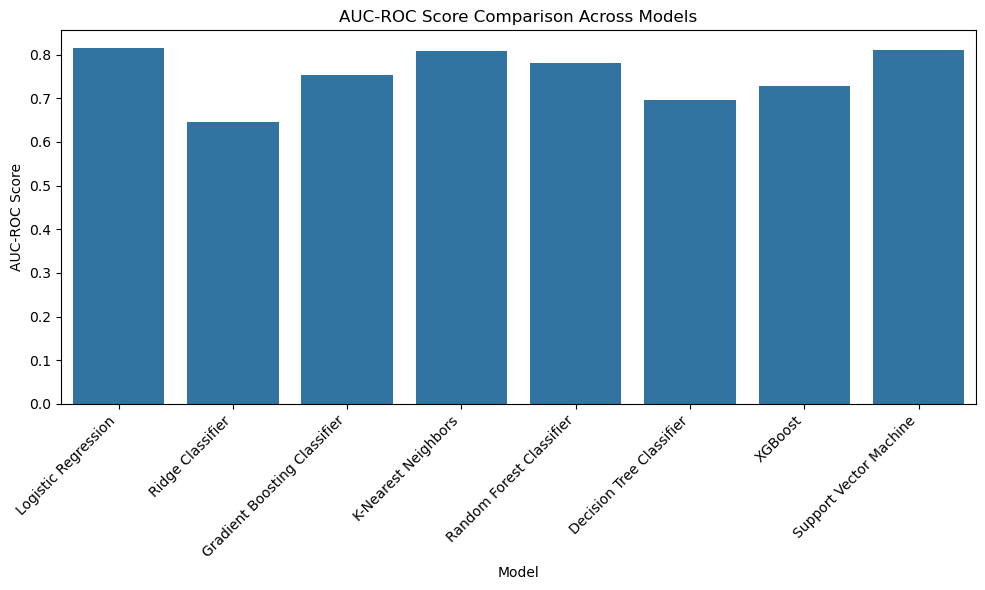

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `results_df` is the DataFrame containing your evaluation metrics
def plot_classification_metrics(results_df, metric_column='AUC-ROC Score'):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric_column, data=results_df)
    plt.title(f'{metric_column} Comparison Across Models')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(metric_column)
    plt.xlabel('Model')
    plt.tight_layout()
    plt.show()

# Example usage
plot_classification_metrics(results_df, metric_column='AUC-ROC Score')


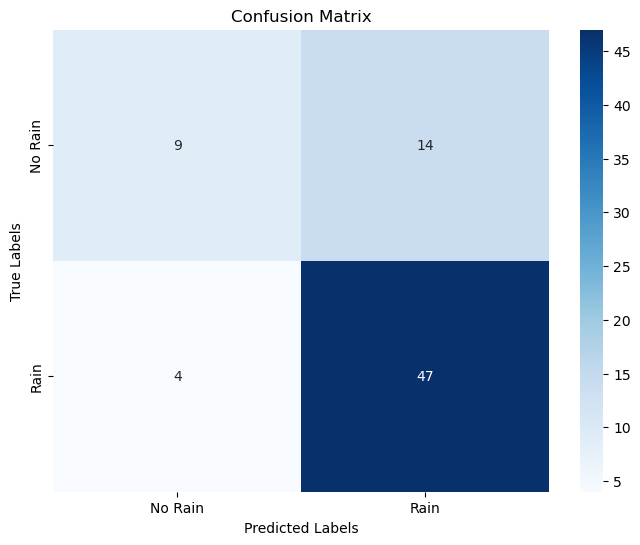

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, X_test_scaled, y_test, labels=None):
    # Generate predictions
    y_pred = model.predict(X_test_scaled)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plotting the confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Example usage
name, best_model = best_model_name
plot_confusion_matrix(best_model, X_test_scaled, y_test, labels=['No Rain', 'Rain'])


### Hyperparameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define the hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': np.logspace(-4, 4, 30),  # Range of C values
    'penalty': ['l1', 'l2'],  # Only 'l1' and 'l2' for this example
    'solver': ['liblinear'],  # Use 'liblinear' which supports 'l1' and 'l2'
    'max_iter': [100, 200, 300, 400],  # Different options for max_iter
    'tol': [1e-4, 1e-3, 1e-2]  # Convergence tolerance
}

# Create a GridSearchCV object
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='roc_auc', verbose=1)

# Fit the model on the training data
grid_search_lr.fit(X_train_scaled, y_train)

# Get the best parameters
print("Best Logistic Regression Parameters: ", grid_search_lr.best_params_)
print("Best Logistic Regression Score: ", grid_search_lr.best_score_)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best Logistic Regression Parameters:  {'C': 0.38566204211634725, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}
Best Logistic Regression Score:  0.8950865946918579


### XGB

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for XGBClassifier
param_grid_xgb = {
    'n_estimators': [100, 200, 300],         # Number of boosting rounds
    'max_depth': [3, 5, 7],                  # Maximum depth of the tree
    'learning_rate': [0.01, 0.1, 0.2],       # Step size shrinkage
    'subsample': [0.7, 0.8, 0.9],            # Subsampling of the training instances
    'colsample_bytree': [0.7, 0.8, 0.9]      # Subsampling of features for each tree
}

# Create a GridSearchCV object
grid_search_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                               param_grid_xgb, cv=5, scoring='roc_auc', verbose=1)

# Fit the model on the training data
grid_search_xgb.fit(X_train_scaled, y_train)  # Ensure you're using the correct y_train

# Get the best parameters
print("Best XGBoost Parameters: ", grid_search_xgb.best_params_)
print("Best XGBoost Score: ", grid_search_xgb.best_score_)



Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best XGBoost Parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
Best XGBoost Score:  0.8850056230319389


### SVC

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 100],          # Regularization parameter
    'kernel': ['linear'],  # Kernel types
    'gamma': ['scale', 'auto'],      # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'degree': [2, 3, 4]              # Degree of the polynomial kernel function ('poly' only)
}

# Create a GridSearchCV object
grid_search_svc = GridSearchCV(SVC(probability=True), param_grid_svc, cv=5, scoring='roc_auc', verbose=1)

# Fit the model on the training data
grid_search_svc.fit(X_train_scaled, y_train)  # Ensure you're using the preprocessed X and y

# Get the best parameters
print("Best SVC Parameters: ", grid_search_svc.best_params_)
print("Best SVC Score: ", grid_search_svc.best_score_)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best SVC Parameters:  {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best SVC Score:  0.8955544309491679


### Evaluation

In [34]:
from sklearn.metrics import roc_auc_score

# Assuming X_train_scaled, X_val_scaled, y_train, y_val have been properly defined
# Use the best models from GridSearchCV or RandomizedSearchCV
best_lr_model = grid_search_lr.best_estimator_  # Or random_search_lr
best_xgb_model = grid_search_xgb.best_estimator_  # Or random_search_xgb
best_svc_model = grid_search_svc.best_estimator_  # Or random_search_svc

# Train and evaluate the best models
for model in [best_lr_model, best_xgb_model, best_svc_model]:
    print(f'Evaluating {type(model).__name__}...')
    
    # Fit the model on the training data
    model.fit(X_train_scaled, y_train)
    
    # Evaluate on training data
    train_preds = model.predict_proba(X_train_scaled)[:, 1]  # Probability of the positive class
    train_auc = roc_auc_score(y_train, train_preds)
    print('Training AUC Score:', train_auc)
    
    # Evaluate on validation data
    val_preds = model.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class
    val_auc = roc_auc_score(y_test, val_preds)
    print('Validation AUC Score:', val_auc)
    print()


Evaluating LogisticRegression...
Training AUC Score: 0.8967332903503116
Validation AUC Score: 0.8124467178175618

Evaluating XGBClassifier...
Training AUC Score: 0.9537932516655921
Validation AUC Score: 0.7689684569479965

Evaluating SVC...
Training AUC Score: 0.8966795615731786
Validation AUC Score: 0.8158567774936062



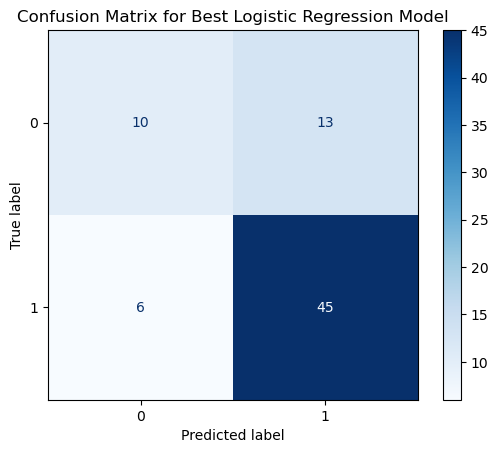

Classification Report for Best Logistic Regression Model:

              precision    recall  f1-score   support

           0       0.62      0.43      0.51        23
           1       0.78      0.88      0.83        51

    accuracy                           0.74        74
   macro avg       0.70      0.66      0.67        74
weighted avg       0.73      0.74      0.73        74



In [35]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Define and fit the Logistic Regression model with the best parameters
best_lr_model = LogisticRegression(
    C=0.03039195382313198,
    max_iter=100,
    penalty='l2',
    solver='liblinear',
    tol=0.01
)
best_lr_model.fit(X_train_scaled, y_train)  # Fit the model on training data

# Plot the confusion matrix for the validation/test data
ConfusionMatrixDisplay.from_estimator(best_lr_model, X_test_scaled, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Best Logistic Regression Model")
plt.show()

# Print the classification report
print("Classification Report for Best Logistic Regression Model:\n")
print(classification_report(y_test, best_lr_model.predict(X_test_scaled)))


### The confusion matrix can be related to real-world scenarios:

##### True Positives (rain is predicted and happens): Farmers will water crops accordingly, or prepare for rainfall, which benefits crop health.
##### True Negatives (no rain predicted and no rain happens): Farmers won’t waste water on unnecessary irrigation.
##### False Positives (rain is predicted but doesn’t happen): Farmers might delay irrigation, potentially risking crops.
##### False Negatives (rain isn’t predicted but happens): Farmers might irrigate unnecessarily, leading to water wastage.